In [1]:
%matplotlib inline

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# kMeans from First Principles

## Custom algorightm

In [193]:
X, y = make_blobs(
    n_samples=16,
    n_features=2,
    centers=2,
    cluster_std=1.0,
    center_box=(-5.0, 5.0),
    random_state=42,
)

In [203]:
# Squared Euclidian distance
def d(v, w):
    result = np.sum((v - w) ** 2)
    return result


def custom_k_means(X, n_clusters=2, max_iter=100, tol=0.01):
    # Choose at random `X` entries to use as initial seeds
    seed_indeces = np.random.choice(np.arange(len(X)), n_clusters, replace=False)
    C = X[seed_indeces, :]
    
    for _ in range(max_iter):
        # Generate matrix with distances from each observation to each centroid
        D = np.array([])
        for x in X:
            distances = np.array([d(x, c) for c in C])
            if D.size == 0:
                D = distances
            else:
                D = np.vstack([D, distances])

        # Create clusters
        labels = D.argmin(axis=1)
        clusters = []
        for l in np.unique(labels):
            indeces = np.where(mask == l)
            clusters.append(X[indeces, :])

        # Calculate feature means for each cluster
        cluster_means = np.array([c.mean(axis=0) for c in clusters])

        # Break if the centroids movement is too small
        movements = [d(C[i], cluster_means[i]) for i in range(len(C))]
        print(movements)
        print(np.sum(movements))
        if np.sum(movements) <= tol:
            break
        
        # Move the centroids
        C = cluster_means
    
    inertia = np.sum(D.min(axis=1))
    return inertia, C

In [204]:
inertia, centroids = custom_k_means(X)
inertia, centroids

[39.30977202048399, 76.86693708201328]
116.17670910249727
[0.0, 0.0]
0.0


(442.6604597316407,
 array([[[-1.48875219,  4.27300611],
         [-2.26742993,  4.8213904 ]],
 
        [[-1.7240732 ,  5.04970311],
         [-1.01263654,  2.59386282]]]))

In [154]:
inertia, centroids

for i, c in enumerate(centroids):
    print(i, c)
    plt.annotate(i, c)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.2)
plt.show()

0 [[ 0.324614    5.27457779]
 [-1.48875219  4.27300611]]
1 [[0.135015   1.96240539]
 [0.324614   5.27457779]]
2 [[-1.15155697  4.65967508]
 [ 1.46898673  0.09317881]]
3 [[ 1.46898673  0.09317881]
 [-1.15155697  4.65967508]]
4 [[-1.15155697  4.65967508]
 [ 1.46898673  0.09317881]]
5 [[ 1.46898673  0.09317881]
 [-1.15155697  4.65967508]]
6 [[-1.15155697  4.65967508]
 [ 1.46898673  0.09317881]]
7 [[ 1.46898673  0.09317881]
 [-1.15155697  4.65967508]]
8 [[-1.15155697  4.65967508]
 [ 1.46898673  0.09317881]]
9 [[ 1.46898673  0.09317881]
 [-1.15155697  4.65967508]]
10 [[-1.15155697  4.65967508]
 [ 1.46898673  0.09317881]]
11 [[ 1.46898673  0.09317881]
 [-1.15155697  4.65967508]]
12 [[-1.15155697  4.65967508]
 [ 1.46898673  0.09317881]]
13 [[ 1.46898673  0.09317881]
 [-1.15155697  4.65967508]]
14 [[-1.15155697  4.65967508]
 [ 1.46898673  0.09317881]]
15 [[ 1.46898673  0.09317881]
 [-1.15155697  4.65967508]]
16 [[-1.15155697  4.65967508]
 [ 1.46898673  0.09317881]]
17 [[ 1.46898673  0.09317881

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 640x480 with 1 Axes>

## Draft

In [8]:
def d(v, w):
    result = np.sum((v - w) ** 2)
    return result

v = np.array([2, 1])
w = np.array([3, 2])
assert d(v,w) == 2

v = np.array([1, 2, 3])
w = np.array([4, 5, 6])
assert d(v,w) == 27

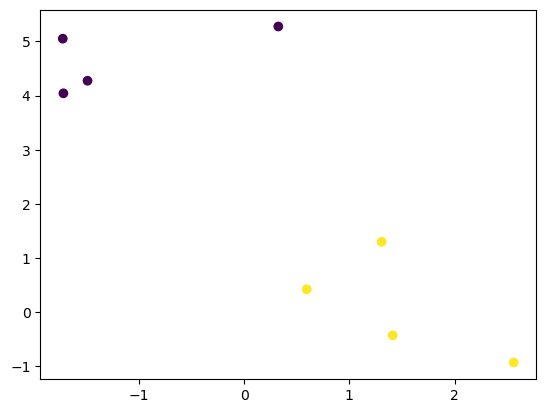

In [15]:
X, y = make_blobs(
    n_samples=8,
    n_features=2,
    centers=2,
    cluster_std=1.0,
    center_box=(-5.0, 5.0),
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [100]:
X

array([[-1.48875219,  4.27300611],
       [ 0.324614  ,  5.27457779],
       [ 2.56190169, -0.9266954 ],
       [-1.7180165 ,  4.04141331],
       [-1.7240732 ,  5.04970311],
       [ 1.3071083 ,  1.30083217],
       [ 1.41191534, -0.42571886],
       [ 0.59502159,  0.42429731]])

In [101]:
n_centers = 2
indeces = np.random.choice(np.arange(len(X)), n_centers, replace=False)
centers = X[indeces, :]

In [102]:
centers

array([[-1.7240732 ,  5.04970311],
       [ 1.3071083 ,  1.30083217]])

In [104]:
distances = np.array([])
for xi in X:
    row = np.array([d(xi, c) for c in centers])
    if distances.size == 0:
        distances = row
    else:
        distances = np.vstack([distances, row])
distances

array([[ 0.65863421, 16.65065373],
       [ 4.24768787, 16.75594928],
       [54.08691989,  6.53638556],
       [ 1.016685  , 16.66216503],
       [ 0.        , 23.24209453],
       [23.24209453,  0.        ],
       [39.81466984,  2.99196299],
       [26.77257938,  1.27538085]])

In [110]:
assigned_labels = distances.argmax(axis=1)
assigned_labels

array([1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [111]:
subsets = [X[assigned_labels == label, :] for label in np.unique(assigned_labels)]
subsets

[array([[ 2.56190169, -0.9266954 ],
        [ 1.3071083 ,  1.30083217],
        [ 1.41191534, -0.42571886],
        [ 0.59502159,  0.42429731]]),
 array([[-1.48875219,  4.27300611],
        [ 0.324614  ,  5.27457779],
        [-1.7180165 ,  4.04141331],
        [-1.7240732 ,  5.04970311]])]

In [114]:
subset_means = [s.mean(axis=0) for s in subsets]
subset_means

[array([1.46898673, 0.09317881]), array([-1.15155697,  4.65967508])]